# Grid Search

In this Notebook we will try to implement Grid Search to find best parameter for parameter tuning

In [9]:
import pandas as pd

#Read the dataset
df = pd.read_csv('Salary_Data.csv')
df.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [19]:
import numpy as np

#Split the features and class
X = df['YearsExperience']
y = df['Salary']

#reshape the feature
X = np.array(X).reshape((30,1))

## Import library GridSearchCV and SVR as a method

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#build the model
model = SVR()
parameters = {
    'kernel' : ['rbf', 'linear'],
    'C' : [1000, 10000, 100000],
    'gamma' : [0.5, 0.05, 0.005]
}

grid_search = GridSearchCV(model, parameters)

#Create model with best params
grid_search.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
#Show the best params
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [27]:
# Create model using best params, the result of grid search
new_model  = SVR(C=100000, gamma=0.005, kernel='rbf')
new_model.fit(X,y)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Visualiazing the result

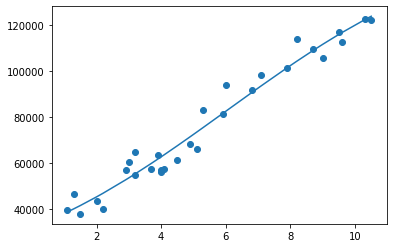

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, new_model.predict(X))